In [84]:
import pandas as pd 
import calmap

### Get aircraft database

In [85]:
data = pd.read_csv('data/aircraft_db.csv')
data['url'] = "https://www.airliners.net/search?keywords=" + data['type'].str.replace(' ', '+')
data.head()

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,icao,regid,mdl,type,operator,url
0,000334,00000000,0000,Edra Super Petrel LS,Private owner,https://www.airliners.net/search?keywords=Edra...
1,000d77,00000000,0000,WT-9 Dynamic,Private owner,https://www.airliners.net/search?keywords=WT-9...
2,000d82,00000000,0000,Aerospool WT9 Dynamic,Private owner,https://www.airliners.net/search?keywords=Aero...
3,001100,00000000,0000,Unknown / Various,Code used by several aircraft,https://www.airliners.net/search?keywords=Unkn...
4,001108,00000000,0000,Gulfstream 690D,Ejercito de Colombia,https://www.airliners.net/search?keywords=Gulf...


In [86]:
data_private = pd.read_csv('data/private_owners.csv')
data_private['purpose'] = 'private'
print("Number of private aircrafts: " + str(len(data_private)/len(data2)))
data_charter = pd.read_csv('data/unscheduled_charter.csv')
data_charter['purpose'] = 'charter'
print("Number of charter aircrafts: " + str(len(data_charter)/len(data2)))
data_rescue = pd.read_csv('data/rescue.csv')
data_rescue['purpose'] = 'rescue'
print("Number of rescue aircrafts: " + str(len(data_rescue)/len(data2)))
data_military = pd.read_csv('data/military.csv')
data_military['purpose'] = 'military'
print("Number of military aircrafts: " + str(len(data_military)/len(data2)))
data_space = pd.read_csv('data/space.csv')
data_space['purpose'] = 'space'
print("Number of space aircrafts: " + str(len(data_space)/len(data2)))
data_training = pd.read_csv('data/academy_and_clubs.csv')
data_training['purpose'] = 'training'
print("Number of training aircrafts: " + str(len(data_training)/len(data2)))
data_cargo = pd.read_csv('data/cargo.csv')
data_cargo['purpose'] = 'cargo'
print("Number of cargo aircrafts: " + str(len(data_cargo)/len(data2)))
data_unknown = pd.read_csv('data/unknown.csv')
data_unknown['purpose'] = 'unknown'
print("Number of unknown aircrafts: " + str(len(data_unknown)/len(data2)))

data2 = pd.concat([data_training, data_space, data_military, data_rescue, data_charter, data_private, data_cargo, data_unknown])

print("Number of aircrafts overall: " + str(len(data2)))



Number of private aircrafts: 0.1287300273728436
Number of charter aircrafts: 0.039396524285441464
Number of rescue aircrafts: 0.0012489655611432936
Number of military aircrafts: 0.04422814946845757
Number of space aircrafts: 0.00029791839073142783
Number of training aircrafts: 0.005879432172639888
Number of cargo aircrafts: 0.4769686167165319
Number of unknown aircrafts: 0.30325036603221084
Number of aircrafts overall: 785450


In [87]:
data2[data2['purpose']=='unknown'].head()

,icao,altitude,latitude,longitude,time,flight_num,purpose
0,3ccb16,0,47.99,10.23,1474546955239,0,unknown
1,3ccb16,0,47.99,10.24,1474546862871,0,unknown
2,3ccb16,1950,47.99,10.24,1474549372599,0,unknown
3,3ccb16,2700,48.67,9.10,1474225891897,4,unknown
4,3ccb16,2825,48.72,9.39,1474654758085,2,unknown


In [88]:
data3 = pd.merge(data2, data, how='inner', on='icao')

In [89]:
data3['time'] = pd.to_datetime(data3['time'], unit = 'ms')

data3 = data3.sort_values(by='time')

data3.head()

,icao,altitude,latitude,longitude,time,flight_num,purpose,regid,mdl,type,operator,url
261293,738c05,40000,46.38,11.13,2016-09-18 00:00:00.664,1,cargo,4x-icb,b744,Boeing 747-412,Cargo Air Lines,https://www.airliners.net/search?keywords=Boei...
198993,acb89b,35025,54.59,9.90,2016-09-18 00:00:00.906,0,cargo,n919fd,b752,Boeing 757-23A,FedEx,https://www.airliners.net/search?keywords=Boei...
173256,abc1da,26050,45.26,7.34,2016-09-18 00:00:00.986,0,cargo,n857fd,b77l,Boeing 777-FS2,FedEx,https://www.airliners.net/search?keywords=Boei...
207793,acc619,37000,39.90,16.06,2016-09-18 00:00:01.130,0,cargo,n922fd,b752,Boeing 757-23A,FedEx,https://www.airliners.net/search?keywords=Boei...
175054,abf0c7,33000,46.75,13.06,2016-09-18 00:00:01.217,0,cargo,n869fd,b77l,Boeing 777-FS2,FedEx,https://www.airliners.net/search?keywords=Boei...


### Data analysis

### Most common operators for each purpose

In [90]:
df_top_freq = data3.groupby(['purpose', 'operator'])['icao'].agg(
    {"Occurence count": len}).sort_values(
    "Occurence count", ascending=False).reset_index()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


In [91]:
df_top_freq[df_top_freq['purpose'] == 'private'].head(5)

,purpose,operator,Occurence count
1,private,Private owner,101111


In [92]:
df_top_freq[df_top_freq['purpose'] == 'cargo'].head(5)

,purpose,operator,Occurence count
0,cargo,FedEx,191261
2,cargo,UPS,26051
3,cargo,DHL,22678
6,cargo,KLM Cargo,13122
7,cargo,Cargo Air,9982


In [93]:
df_top_freq[df_top_freq['purpose'] == 'military'].head(5)

,purpose,operator,Occurence count
4,military,Swiss Air Force,14981
13,military,Royal Air Force,7778
15,military,Italian Air Force,7081
39,military,Airbus Military,1217
41,military,French Air Force,1124


In [94]:
df_top_freq[df_top_freq['purpose'] == 'training'].head(5)

,purpose,operator,Occurence count
19,training,Oxford Aviation Academy,3575
54,training,European Aircraft Private Club,619
87,training,Aero Club Bergamo,173
94,training,Motorflug-Club Salzgitter eV,91
95,training,Aero Club de Valence,86


In [95]:
print(df_top_freq[df_top_freq['purpose'] == 'rescue'].drop('purpose', axis=1).head(5).to_latex(index=False))

\begin{tabular}{lr}
\toprule
          operator &  Occurence count \\
\midrule
 German Air Rescue &              981 \\
\bottomrule
\end{tabular}



### Most common types for each purpose

In [96]:
df_top_freq = data3.groupby(['purpose', 'type'])['icao'].agg(
    {"Occurrence count": len}).sort_values(
    "Occurrence count", ascending=False).reset_index()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


In [97]:
df_top_freq[df_top_freq['purpose'] == 'private'].head(5)

,purpose,type,Occurrence count
36,private,Cirrus SR22,3217
39,private,Cirrus SR22T,2941
56,private,Piper PA28-161,1828
59,private,Beech B200 Super King Air,1668
62,private,Bell 429 GlobalRanger,1629


In [98]:
df_top_freq[df_top_freq['purpose'] == 'cargo'].head(5)

,purpose,type,Occurrence count
0,cargo,McDonnell Douglas MD-11F,46172
1,cargo,Airbus A300B4-622R,38008
2,cargo,Boeing 757-23A,22132
3,cargo,Boeing 757-236,20889
4,cargo,Boeing 757-28A,14235


In [99]:
df_top_freq[df_top_freq['purpose'] == 'military'].head(5)

,purpose,type,Occurrence count
9,military,Pilatus PC-21,8649
18,military,Boeing 767-2EY,5457
26,military,Airbus KC2 Voyager,4738
28,military,Pilatus PC21,4241
43,military,British Aerospace Avro RJ100,2605


In [100]:
df_top_freq[df_top_freq['purpose'] == 'training'].head(5)

,purpose,type,Occurrence count
73,training,Piper PA34-220T Seneca IV,1325
74,training,Piper PA34-220T Seneca,1322
97,training,Piper PA-34-220T Seneca V,928
129,training,Pilatus PC-12/47E,619
330,training,Cessna 152,173


In [101]:
df_top_freq[df_top_freq['purpose'] == 'unknown'].head(5)

,purpose,type,Occurrence count


### Average altitude for each purpose

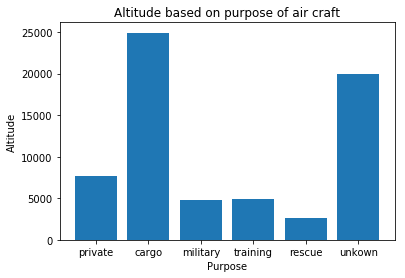

In [109]:
import matplotlib.pyplot as plt

average_altitude = pd.DataFrame({'Purpose': ['private', 'cargo', 'military', 'training', 'rescue', 'unkown'],
                                'Altitude': [7716.52, 24920.4, 4815.72, 4898.03, 2623.47, 19968.8]})

plt.bar(average_altitude['Purpose'], average_altitude['Altitude'])
plt.title('Altitude based on purpose of air craft')
plt.ylabel('Altitude')
plt.xlabel('Purpose')
plt.show()

In [103]:
print('The average altitude for private aircrafts is: ' + str(round(data3[data3['purpose'] == 'private']['altitude'].mean(), 2)))

The average altitude for private aircrafts is: 7716.52


In [104]:
print('The average altitude for cargo aircrafts is: ' + str(round(data3[data3['purpose'] == 'cargo']['altitude'].mean(), 2)))

The average altitude for cargo aircrafts is: 24920.4


In [105]:
print('The average altitude for military aircrafts is: ' + str(round(data3[data3['purpose'] == 'military']['altitude'].mean(), 2)))

The average altitude for military aircrafts is: 14815.72


In [106]:
print('The average altitude for training aircrafts is: ' + str(round(data3[data3['purpose'] == 'training']['altitude'].mean(), 2)))

The average altitude for training aircrafts is: 4898.03


In [107]:
print('The average altitude for rescue aircrafts is: ' + str(round(data3[data3['purpose'] == 'rescue']['altitude'].mean(), 2)))

The average altitude for rescue aircrafts is: 2623.47


In [108]:
print('The average altitude for unkown aircrafts is: ' + str(round(data2[data2['purpose'] == 'unknown']['altitude'].mean(), 2)))

The average altitude for unkown aircrafts is: 19968.8
